In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt 
import colorcet as cc

from IPython.display import display, HTML

import time
from datetime import datetime
from random import randint

import roc
from roc import auc_by_utest, auc_by_roc_coordinates, roc_coordinates, plot_pdf, plot_roc
cmap_grey = cc.cm.linear_grey_0_100_c0


%%capture
%run numpngw.ipynb

In [3]:
data = pd.read_csv( "../../predictions.csv")
data.head(2)

,target,prob_target,predicted,prob_pre
0,pHealthy,0.937,pHealthy,0.937
1,pHealthy,0.937,pHealthy,0.937


In [4]:
from scipy.stats import mannwhitneyu

def auc_area(df):
    roc_fpr, roc_tpr = roc_curve_coordinates(df)
    auc = auc_score(roc_fpr, roc_tpr)
    if auc < 0.50:
        auc = 1.0 - auc
    return(auc)

def get_df(l):
    label= [1] * l + [0] * l
    score= [  randint(0,l*100) for p in range(0,l)] \
            + [randint(0,l*100*2) for p in range(0,l)]
    data = {"class":label, "score": score}
    df = pd.DataFrame(data=data)
    return(df)

df = get_df(15)

#display(df)

print("auc_by_utest: ", round(auc_by_utest( df["class"], df["score"] ),3) )

v0,v1 = np.asarray(df.score[df["class"]==0]), np.asarray(df.score[df["class"]==1])
statistic, pvalue = mannwhitneyu(v0,v1)
auc = statistic / ( len(v0) * len(v1) )
auc = auc if auc > 0.5 else (1-auc)
print("from scipy: ",round(auc,3))

#plot the roc curve
metrics, roc_classes = roc_coordinates(df["class"], df["score"], [0])
auc = auc_by_roc_coordinates(metrics.false_positive, metrics.true_positive)
if auc < 0.50:
    auc = 1.0 - auc

print("from auc_score: ",round(auc,3))


auc_by_utest:  0.813
from scipy:  0.813
from auc_score:  0.814


In [5]:
data=df
#data.rename(columns={ "target":"class", "prob_target":"score", "predicted":"predicted", "prob_pre":"prob_pre"  },inplace=True)
display(data.head(5))

#roc_curve_coordinates(data)
print(len(data["class"]), data["score"].shape )
print("auc_u_test: ", round(auc_by_utest( data["class"], data["score"] ),3))


v0,v1  = np.asarray(df.score[df["class"]==0]), np.asarray(df.score[df["class"]==1])
statistic, pvalue = mannwhitneyu(v0,v1)
auc = statistic / ( len(v0) * len(v1) )
auc = auc if auc > 0.5 else (1-auc)
print("from scipy: ",round(auc,3))


,class,score
0,1,1054
1,1,1426
2,1,568
3,1,553
4,1,1479


30 (30,)
auc_u_test:  0.813
from scipy:  0.813


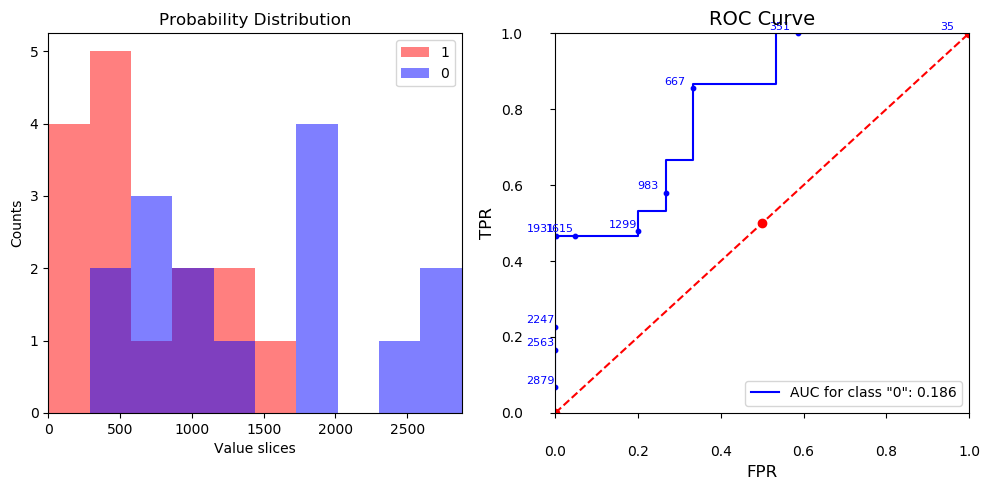

In [7]:
classes              = np.array(list( {k:1 for k in data["class"]} ))
class_predictions    = { c:np.asarray(data.score[data["class"]==c]) for c in classes }
metrics, roc_classes = roc_coordinates( df["class"], df["score"], [0])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,5), dpi=100)
plot_roc( np.asarray(metrics.score), np.asarray(metrics.true_positive), np.asarray(metrics.false_positive), roc_classes[0], ax=ax2 )
plot_pdf( np.linspace(0,np.max(df["score"]),11), class_predictions, colors=["r","b"], ax= ax1)
plt.tight_layout()
#display(metrics)

